In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import htdeblur as md
from htdeblur import analysis
from comptic import noise
from comptic.containers import Dataset, isDataset

# Platform imports
import os, glob
from os.path import expanduser

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

# plt.style.use('deblur')

In [2]:
figure_directory = '/Users/zfphil/Dropbox/Berkeley/Phase-Deblurring/journalpaper/figures'
figure_directory = '/Users/zfphil/Desktop'

## Load Brightfield Data

In [3]:
res_coded_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/res_target_snr_comparison/res_line_bright_coded_raster_100_motion_deblur_2019_02_05_10_52_50_reprocess_regularize=[].npz')
res_strobe_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/res_target_snr_comparison/res_line_bright_strobe_raster_1_motion_deblur_2019_02_05_10_53_59_reprocess_regularize=[].npz')
res_constant_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/res_target_snr_comparison/res_line_bright_constant_raster_100_motion_deblur_2019_02_05_10_54_51_reprocess_regularize=[].npz')
res_sns_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/res_target_snr_comparison/res_line_bright_stopandstare_stop_and_stare_2019_02_05_10_57_04_reprocess_regularize=[].npz')

<IPython.core.display.Javascript object>


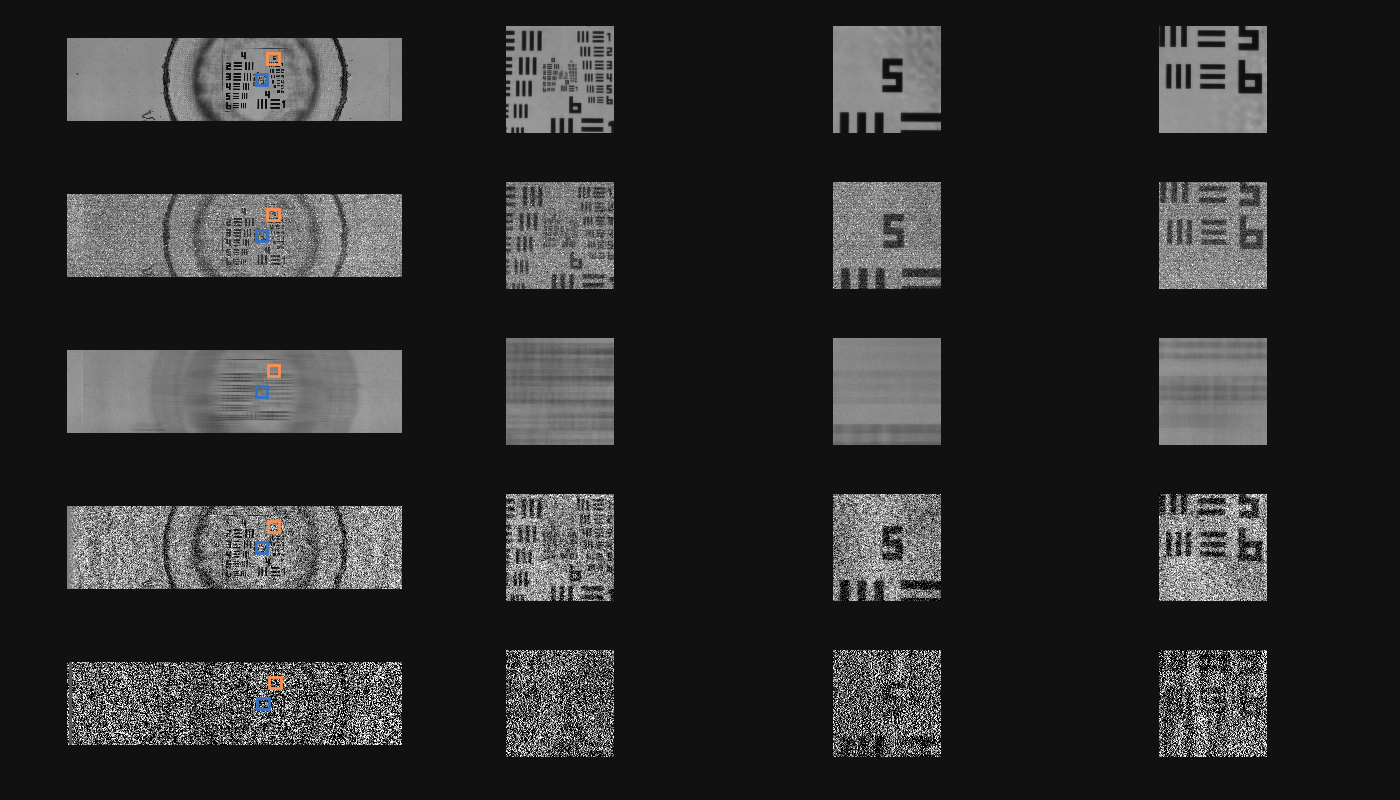

In [4]:
res_coded_unreg = np.real(res_coded_unreg_archive['object_recovered'])
res_constant_unreg = np.real(res_constant_unreg_archive['object_recovered'])
res_constant_raw = np.real(res_constant_unreg_archive['y'])
res_strobe_unreg = np.real(res_strobe_unreg_archive['y'])
res_sns_unreg = np.real(res_sns_unreg_archive['object_recovered'])[:, :res_strobe_unreg.shape[1]]
res_coded_raw = np.real(res_coded_unreg_archive['y'])

# Normalize all to have same median value
res_coded_unreg = res_coded_unreg / yp.mean((res_coded_unreg))
res_constant_unreg = res_constant_unreg / yp.mean((res_constant_unreg))
res_constant_raw = res_constant_raw / yp.mean((res_constant_raw))
res_strobe_unreg = res_strobe_unreg / yp.mean(res_strobe_unreg)
res_sns_unreg = res_sns_unreg / yp.mean((res_sns_unreg))
res_coded_raw = res_coded_raw / yp.mean((res_coded_raw))

# Shift strobe to match coded
res_strobe_unreg = yp.circshift(res_strobe_unreg, (0, 450))

# Shift Coded by kernel size / 2
res_coded_raw = yp.circshift(res_coded_raw, (0, 422))

# Shift sns to match coded
res_sns_unreg = yp.circshift(res_sns_unreg, (0, -325))

# Shift const to match coded
res_constant_unreg = yp.circshift(res_constant_unreg, (0, 52))
res_constant_raw = yp.circshift(res_constant_raw, (0, 52 + 422))

res_roi_crop_B_1 = yp.Roi(start=(1000-75,4950-25), shape=(300,300))
res_roi_crop_B_2 = yp.Roi(start=(462-75,5228), shape=(300,300))
res_roi_crop_B_3 = yp.Roi(start=(1324-75,5350), shape=(300,300))
# res_roi_crop_B_1 = yp.Roi(start=(832,732), shape=(300,300))

max_val = 2
min_val = 0

strobe_min = 0.8
strobe_max = 1.2

const_max_val = 3

plt.figure(figsize=(14,8))
plt.subplot(5,4,1)
plt.imshow(res_sns_unreg)
plt.axis('off')
plt.clim((min_val, max_val))
res_roi_crop_B_1.draw(plt.gca(), c='b')
res_roi_crop_B_2.draw(plt.gca(), c='y')
plt.subplot(5,4,5)
plt.imshow(res_strobe_unreg)
plt.axis('off')
plt.clim((strobe_min, strobe_max))
res_roi_crop_B_1.draw(plt.gca(), c='b')
res_roi_crop_B_2.draw(plt.gca(), c='y')
plt.subplot(5,4,9)
plt.imshow(res_coded_raw)
plt.axis('off')
plt.clim((min_val, max_val))
res_roi_crop_B_1.draw(plt.gca(), c='b')
res_roi_crop_B_2.draw(plt.gca(), c='y')
plt.subplot(5,4,13)
plt.imshow(res_coded_unreg)
plt.axis('off')
plt.clim((min_val, max_val))
res_roi_crop_B_1.draw(plt.gca(), c='b')
res_roi_crop_B_2.draw(plt.gca(), c='y')
plt.subplot(5,4,17)
plt.imshow(res_constant_unreg)
plt.axis('off')
plt.clim((min_val, const_max_val))
res_roi_crop_B_1.draw(plt.gca(), c='b')
res_roi_crop_B_2.draw(plt.gca(), c='y')

plt.subplot(542)
plt.imshow(res_sns_unreg[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(546)
plt.imshow(res_strobe_unreg[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim((strobe_min, strobe_max))
plt.subplot(5,4,10)
plt.imshow(res_coded_raw[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,14)
plt.imshow(res_coded_unreg[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,18)
plt.imshow(res_constant_unreg[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim((min_val, const_max_val))

plt.subplot(543)
plt.imshow(res_sns_unreg[res_roi_crop_B_2.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(547)
plt.imshow(res_strobe_unreg[res_roi_crop_B_2.slice])
plt.axis('off')
plt.clim((strobe_min, strobe_max))
plt.subplot(5,4,11)
plt.imshow(res_coded_raw[res_roi_crop_B_2.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,15)
plt.imshow(res_coded_unreg[res_roi_crop_B_2.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,19)
plt.imshow(res_constant_unreg[res_roi_crop_B_2.slice])
plt.axis('off')
plt.clim((min_val, const_max_val))

plt.subplot(544)
plt.imshow(res_sns_unreg[res_roi_crop_B_3.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(548)
plt.imshow(res_strobe_unreg[res_roi_crop_B_3.slice])
plt.axis('off')
plt.clim((strobe_min, strobe_max))
plt.subplot(5,4,12)
plt.imshow(res_coded_raw[res_roi_crop_B_3.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,16)
plt.imshow(res_coded_unreg[res_roi_crop_B_3.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,4,20)
plt.imshow(res_constant_unreg[res_roi_crop_B_3.slice])
plt.axis('off')
plt.clim((min_val, const_max_val))


plt.tight_layout()

## Calculate and Compare SNR

<IPython.core.display.Javascript object>


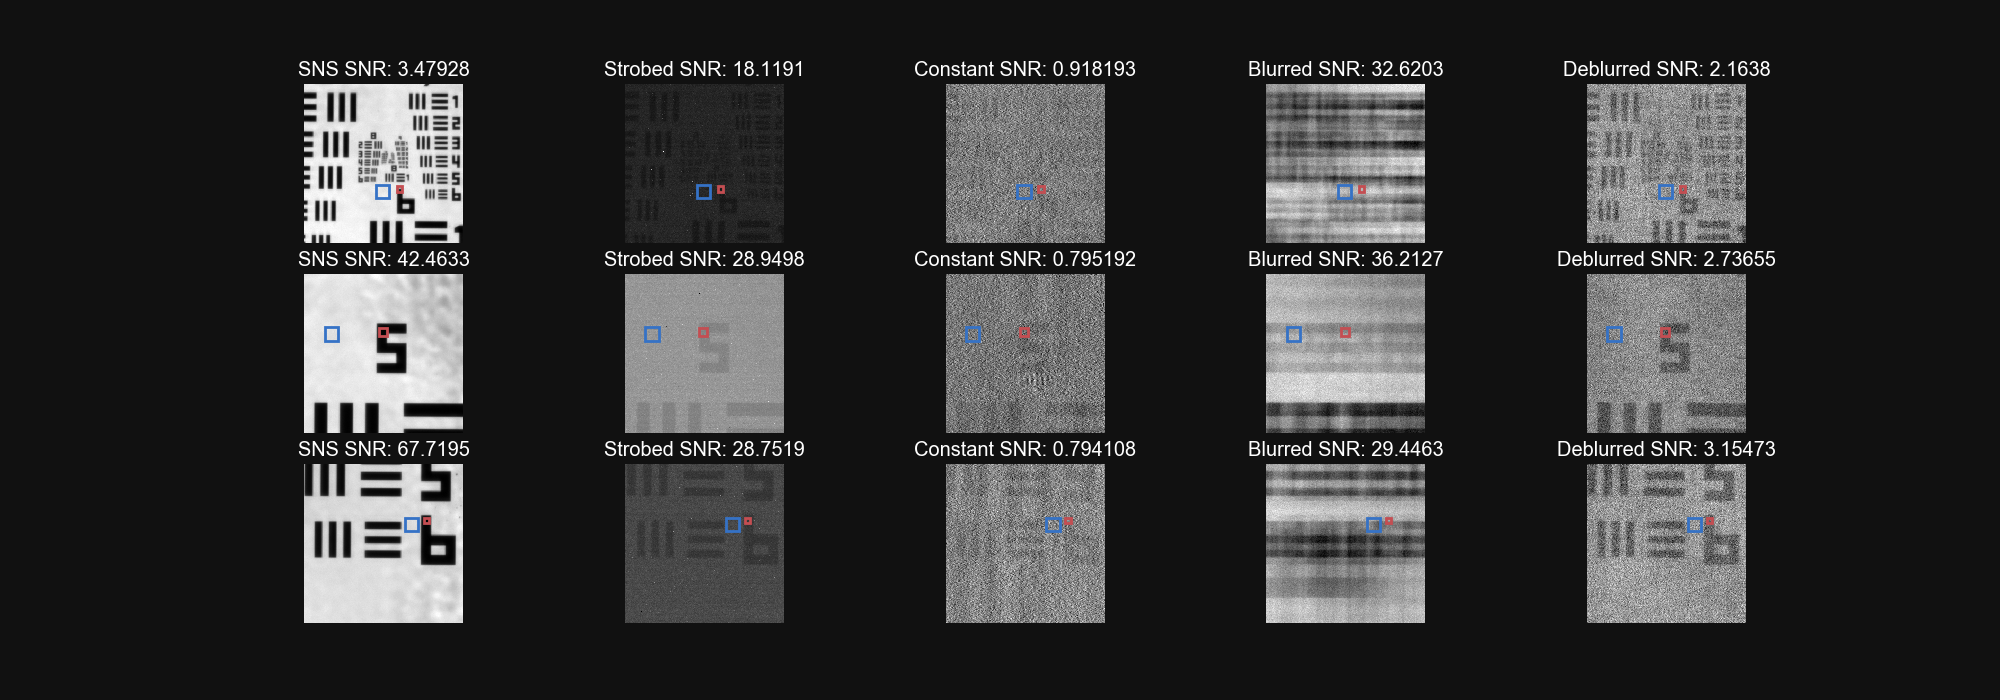

In [5]:
plt.figure(figsize=(20,7))
roi_list = (res_roi_crop_B_1, res_roi_crop_B_2, res_roi_crop_B_3)

snr_sns_res_list, snr_strobed_res_list, snr_const_res_list, snr_const_raw_res_list, snr_coded_raw_res_list, snr_coded_res_list = [], [], [], [], [], []

# white is bg, whole thing is fg
# signal_roi_list = (yp.Roi(start=(0, 0), shape=(99,99)), yp.Roi(start=(0,0), shape=(99,99)), yp.Roi(start=(0,0), shape=(99,99)))
# noise_roi_list = (yp.Roi(start=(60,0), shape=(15,15)), yp.Roi(start=(0,0), shape=(25,25)), yp.Roi(start=(0,0), shape=(25,25)))

# # White is fg and bg
# noise_roi_list = (yp.Roi(start=(20, 0), shape=(10,10)), yp.Roi(start=(20,0), shape=(10,10)), yp.Roi(start=(20,0), shape=(10,10)))
# signal_roi_list = (yp.Roi(start=(86,18), shape=(10,10)), yp.Roi(start=(10,75), shape=(10,10)), yp.Roi(start=(0,38), shape=(10,10)))

# Black is bg, white is fg
noise_roi_list = (yp.Roi(start=(193, 175), shape=(10,10)), yp.Roi(start=(101,140), shape=(15,15)), yp.Roi(start=(100,226), shape=(10,10)))
signal_roi_list = (yp.Roi(start=(190,135), shape=(25,25)), yp.Roi(start=(100,38), shape=(25,25)), yp.Roi(start=(100,190), shape=(25,25)))
# noise_roi_list = signal_roi_list
for index, (roi, signal_roi, noise_roi) in enumerate(zip(roi_list, signal_roi_list, noise_roi_list)):
    
    res_sns_snr_crop = res_sns_unreg[roi.slice]
    res_strobe_snr_crop = res_strobe_unreg[roi.slice]
    res_coded_snr_crop = res_coded_unreg[roi.slice]
    res_constant_snr_crop = res_constant_unreg[roi.slice]
    res_constant_raw_snr_crop = res_constant_raw[roi.slice]
    res_coded_raw_snr_crop = res_coded_raw[roi.slice]
    
    # Calculate SNR
    subtract_noise_mean_from_signal = True
    snr_sns_res = noise.snr(res_sns_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_strobe_res = noise.snr(res_strobe_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_const_res = noise.snr(res_constant_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_const_raw_res = noise.snr(res_constant_raw_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_coded_raw_res = noise.snr(res_coded_raw_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_coded_res = noise.snr(res_coded_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)

    plt.subplot(len(roi_list), 5, 1 + index * 5)
    plt.imshow(res_sns_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('SNS SNR: %g' % snr_sns_res)

    plt.subplot(len(roi_list), 5, 2 + index * 5)
    plt.imshow(res_strobe_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Strobed SNR: %g' % snr_strobe_res)
    
    plt.subplot(len(roi_list), 5, 3 + index * 5)
    plt.imshow(res_constant_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Constant SNR: %g' % snr_const_res)

    plt.subplot(len(roi_list), 5, 4 + index * 5)
    plt.imshow(res_coded_raw_snr_crop)
    plt.axis('off') 
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Blurred SNR: %g' % snr_coded_raw_res)

    plt.subplot(len(roi_list), 5, 5 + index * 5)
    plt.imshow(res_coded_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Deblurred SNR: %g' % snr_coded_res)
    
    snr_sns_res_list.append(snr_sns_res)
    snr_strobed_res_list.append(snr_strobe_res)
    snr_const_res_list.append(snr_const_res)
    snr_const_raw_res_list.append(snr_const_raw_res)
    snr_coded_raw_res_list.append(snr_coded_raw_res)
    snr_coded_res_list.append(snr_coded_res)
    
# Calculate standard error
snr_sns_error_res = np.std(np.asarray(snr_sns_res_list)) /np.sqrt(len(snr_sns_res_list))
snr_strobed_error_res = np.std(np.asarray(snr_strobed_res_list)) / np.sqrt(len(snr_strobed_res_list))
snr_const_error_res = np.std(np.asarray(snr_const_res_list)) / np.sqrt(len(snr_const_res_list))
snr_const_raw_error_res = np.std(np.asarray(snr_const_raw_res_list)) / np.sqrt(len(snr_const_raw_res_list))
snr_coded_raw_error_res = np.std(np.asarray(snr_coded_raw_res_list)) / np.sqrt(len(snr_coded_raw_res_list))
snr_coded_error_res = np.std(np.asarray(snr_coded_res_list)) / np.sqrt(len(snr_coded_res_list))

# Calculate mean
snr_sns_res = np.mean(np.asarray(snr_sns_res_list))
snr_strobed_res = np.mean(np.asarray(snr_strobed_res_list))
snr_constant_res = np.mean(np.asarray(snr_const_res_list))
snr_coded_raw_res = np.mean(np.asarray(snr_coded_raw_res_list))
snr_coded_res = np.mean(np.asarray(snr_coded_res_list))

## Save comparison Figures

<IPython.core.display.Javascript object>


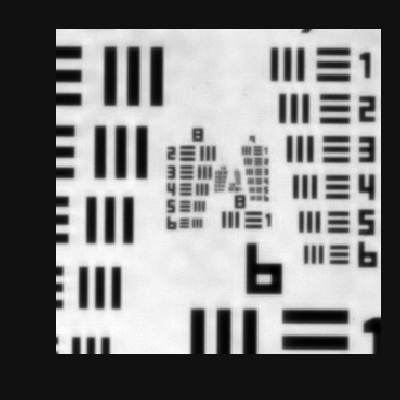

<IPython.core.display.Javascript object>


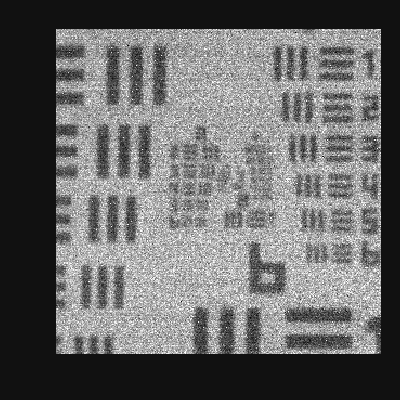

<IPython.core.display.Javascript object>


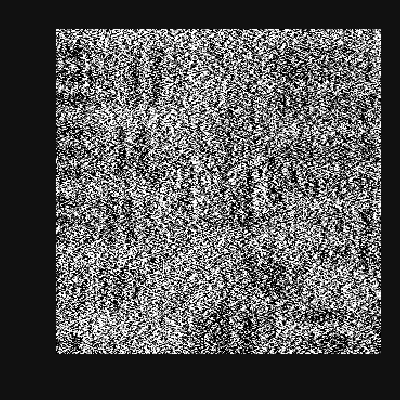

<IPython.core.display.Javascript object>


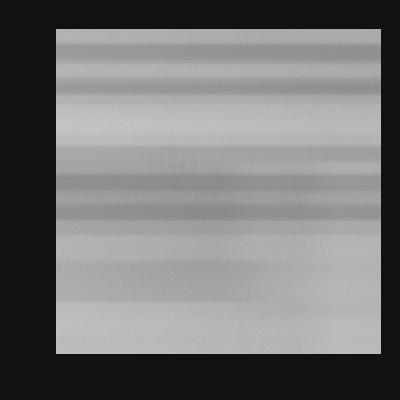

<IPython.core.display.Javascript object>


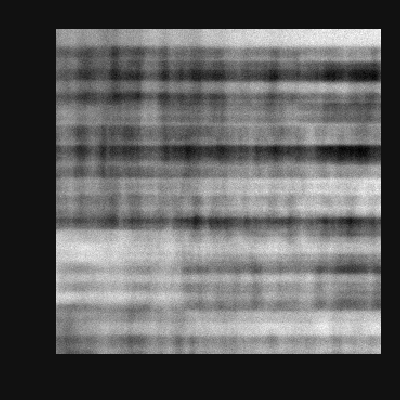

<IPython.core.display.Javascript object>


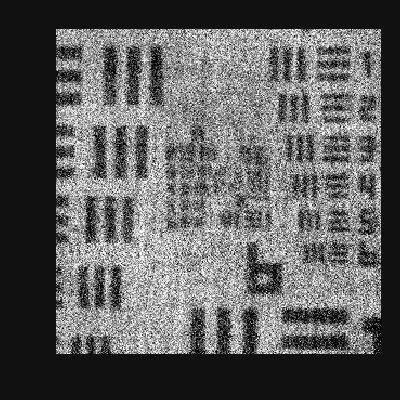

In [6]:
roi = res_roi_crop_B_1

res_sns_snr_crop = res_sns_unreg[roi.slice]
res_strobe_snr_crop = res_strobe_unreg[roi.slice]
res_constant_snr_crop = res_constant_unreg[roi.slice]
res_coded_snr_crop = res_coded_unreg[roi.slice]
res_coded_raw_snr_crop = res_coded_raw[roi.slice]

plt.figure(figsize=(4,4))
plt.imshow(res_sns_snr_crop)
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(res_strobe_snr_crop)
plt.axis('off')
plt.clim((0.8,1.1))
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_strobe.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(res_constant_snr_crop)
plt.axis('off')
plt.clim((0,2.0))
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_const.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(res_constant_raw_snr_crop)
plt.axis('off')
plt.clim((0,1.5))
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_const_raw.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(res_coded_raw_snr_crop)
plt.axis('off') 
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_blurred.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(res_coded_snr_crop)
plt.clim((0,1.8))
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_res_deblurred.pdf'), transparent=True)

## Load Beads Data

In [7]:
# beads_coded_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_coded_raster_100_motion deblur_2019_01_24_14_24_03_regularize=[].npz')
# beads_strobe_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_strobe_raster_1_motion deblur_2019_01_24_14_25_00_regularize=[].npz')
# beads_sns_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_stopandstare_stop and stare_2019_01_24_14_23_37_regularize=[].npz')

# beads_coded_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_coded_raster_100_motion deblur_2019_01_24_14_24_03_no_median_regularize=[].npz')
# beads_strobe_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_strobe_raster_1_motion deblur_2019_01_24_14_25_00_no_median_regularize=[].npz')
# beads_sns_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads_line_stopandstare_stop and stare_2019_01_24_14_23_37_no_median_regularize=[].npz')

# Less Dim
beads_coded_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36_no_median_regularize=[].npz')
beads_strobe_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads2_line_45ms_strobe_raster_1_motion_deblur_2019_02_04_16_45_48_no_median_regularize=[].npz')
beads_constant_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads2_line_45ms_constant_raster_1_motion_deblur_2019_02_04_16_45_23_no_median_regularize=[].npz')
beads_sns_unreg_archive = np.load('/Users/zfphil/datasets/motiondeblur/beads_output/beads2_line_45ms_stopandstare_stop_and_stare_2019_02_04_16_44_59_no_median_regularize=[].npz')

<IPython.core.display.Javascript object>


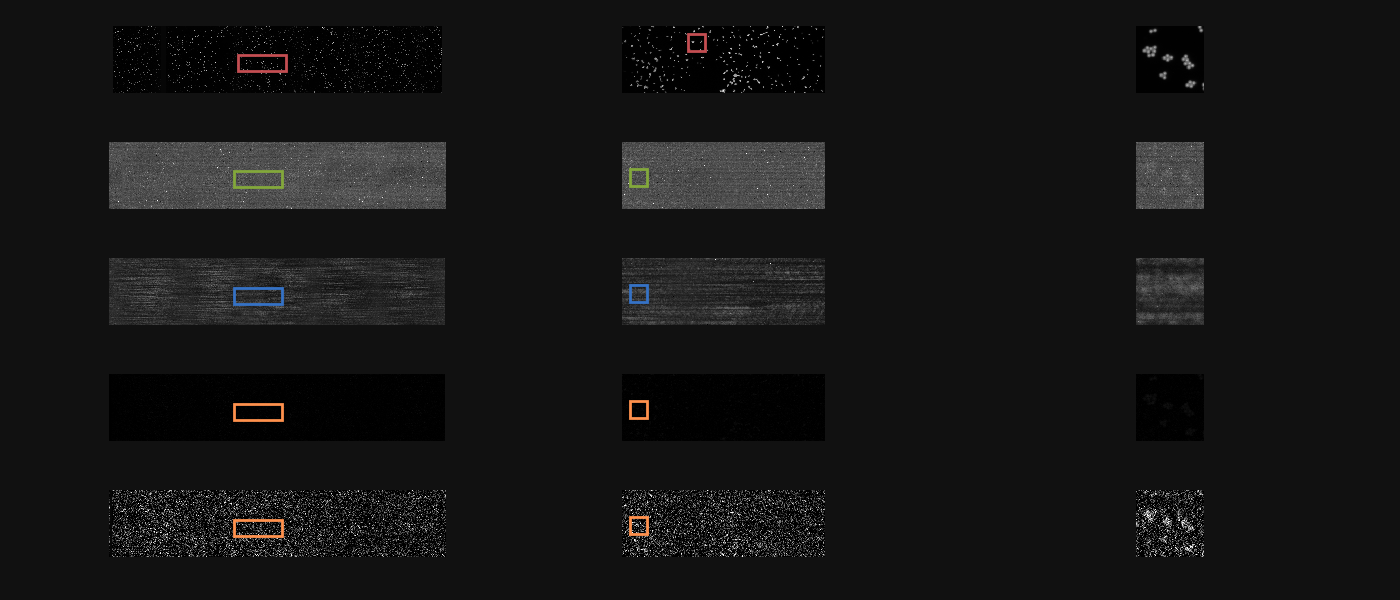

In [8]:
beads_coded_unreg = np.real(beads_coded_unreg_archive['object_recovered'])
beads_strobe_unreg = np.real(beads_strobe_unreg_archive['object_recovered'])
beads_constant_unreg = np.real(beads_constant_unreg_archive['object_recovered'])
beads_constant_raw_unreg = np.real(beads_constant_unreg_archive['y'])
beads_sns_unreg = np.real(yp.fliplr(beads_sns_unreg_archive['object_recovered']))
beads_coded_raw = np.real(beads_coded_unreg_archive['y'])

    
mean_coded = np.mean(beads_coded_unreg)
mean_coded_raw = np.mean(beads_coded_raw)
mean_constant = np.mean(beads_constant_unreg)
mean_constant_raw = np.mean(beads_constant_raw_unreg)
mean_strobe = np.mean(beads_strobe_unreg)
mean_sns = np.mean(beads_sns_unreg)

# Add one so background has value 1
beads_coded_unreg = beads_coded_unreg
beads_strobe_unreg = beads_strobe_unreg
beads_sns_unreg = beads_sns_unreg
beads_constant_raw_unreg = beads_constant_raw_unreg
beads_constant_unreg = beads_constant_unreg
beads_coded_raw = beads_coded_raw

# # # Shift strobe to match coded
beads_strobe_unreg = yp.circshift(beads_strobe_unreg, (0, 428))

# # # Shift sns to match coded
beads_sns_unreg = yp.circshift(beads_sns_unreg, (0, 1694))

# # # Shift Coded by kernel size / 2
beads_constant_unreg = yp.circshift(beads_constant_unreg, (0, 45))#64

# # # Shift Coded by kernel size / 2
beads_constant_raw_unreg = yp.circshift(beads_constant_raw_unreg, (0, 45 + 150))#64

# # # Shift Coded by kernel size / 2
beads_coded_raw = yp.circshift(beads_coded_raw, (0, 150))#64

beads_roi_crop_A = yp.Roi(start=(950, 4000), shape=(512, 1536))
beads_roi_crop_B_0 = yp.Roi(start=(1044-32, 4501), shape=(128, 128))
beads_roi_crop_B_1 = yp.Roi(start=(1465-32, 4735), shape=(128, 128))
beads_roi_crop_B_2 = yp.Roi(start=(1178-32+10, 4049+10), shape=(128, 128))

beads_roi_crop_B = beads_roi_crop_B_2
min_val = 300
max_val = 40000
coded_raw_factor = 40
strobe_factor = 75
constant_factor = 2

plt.figure(figsize=(14,6))
plt.subplot(5,3,1)
plt.imshow(beads_sns_unreg)
plt.axis('off')
plt.clim((min_val, max_val))
beads_roi_crop_A.draw(plt.gca(), c='r')
plt.subplot(5,3,4)
plt.imshow(beads_strobe_unreg)
plt.axis('off')
plt.clim((min_val, max_val / strobe_factor))
beads_roi_crop_A.draw(plt.gca(), c='g')
plt.subplot(5,3,7)
plt.imshow(beads_coded_raw)
plt.axis('off')
plt.clim((min_val, max_val / coded_raw_factor))
beads_roi_crop_A.draw(plt.gca(), c='b')
plt.subplot(5,3,10)
plt.imshow(beads_coded_unreg)
plt.axis('off')
plt.clim((min_val, max_val))
beads_roi_crop_A.draw(plt.gca(), c='y')
plt.subplot(5,3,13)
plt.imshow(beads_constant_unreg)
plt.axis('off')
plt.clim((min_val, max_val / constant_factor))
beads_roi_crop_A.draw(plt.gca(), c='y')

plt.subplot(532)
plt.imshow(beads_sns_unreg[beads_roi_crop_A.slice])
plt.axis('off')
plt.clim((min_val, max_val))
(beads_roi_crop_B_0 - beads_roi_crop_A.start).draw(plt.gca(), c='r')
plt.subplot(535)
plt.imshow(beads_strobe_unreg[beads_roi_crop_A.slice])
plt.axis('off')
plt.clim((min_val, max_val / strobe_factor))
(beads_roi_crop_B - beads_roi_crop_A.start).draw(plt.gca(), c='g')
plt.subplot(538)
plt.imshow(beads_coded_raw[beads_roi_crop_A.slice])
plt.axis('off')
plt.clim((min_val, max_val / coded_raw_factor))
(beads_roi_crop_B - beads_roi_crop_A.start).draw(plt.gca(), c='b')
plt.subplot(5,3,11)
plt.imshow(beads_coded_unreg[beads_roi_crop_A.slice])
plt.axis('off')
plt.clim((min_val, max_val))
(beads_roi_crop_B - beads_roi_crop_A.start).draw(plt.gca(), c='y')
plt.subplot(5,3,14)
plt.imshow(beads_constant_unreg[beads_roi_crop_A.slice])
plt.axis('off')
plt.clim((min_val, max_val / constant_factor))
(beads_roi_crop_B - beads_roi_crop_A.start).draw(plt.gca(), c='y')

plt.subplot(533)
plt.imshow(beads_sns_unreg[beads_roi_crop_B.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(536)
plt.imshow(beads_strobe_unreg[beads_roi_crop_B.slice])
plt.axis('off')
plt.clim((min_val, max_val / strobe_factor))
plt.subplot(539)
plt.imshow(beads_coded_raw[beads_roi_crop_B.slice])
plt.axis('off')
plt.clim((min_val, max_val / coded_raw_factor))
plt.subplot(5,3,12)
plt.imshow(beads_coded_unreg[beads_roi_crop_B.slice])
plt.axis('off')
plt.clim((min_val, max_val))
plt.subplot(5,3,15)
plt.imshow(beads_constant_unreg[beads_roi_crop_B.slice])
plt.axis('off')
plt.clim((min_val, max_val /constant_factor))
plt.tight_layout()

## Calculate and Compare SNR

<IPython.core.display.Javascript object>


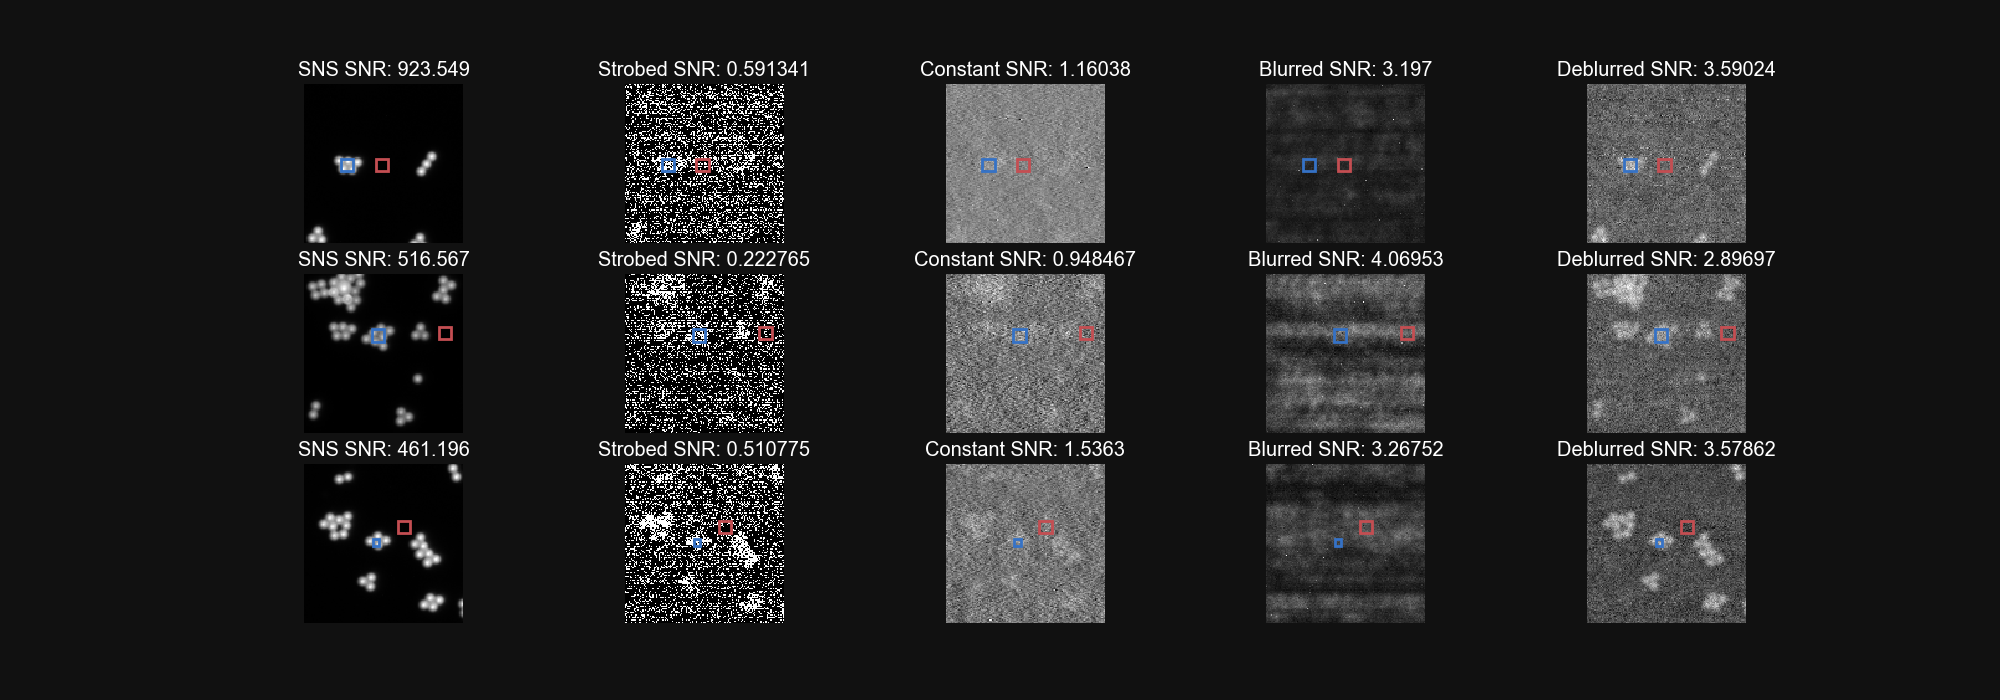

In [9]:
plt.figure(figsize=(20,7))
roi_list = (beads_roi_crop_B_0, beads_roi_crop_B_1, beads_roi_crop_B_2)

snr_sns_beads_list, snr_strobed_beads_list, snr_constant_beads_list, snr_constant_raw_beads_list, snr_coded_raw_beads_list, snr_coded_beads_list = [], [], [], [], [], []

signal_roi_list = (yp.Roi(start=(60,29), shape=(10,10)), yp.Roi(start=(44,54), shape=(10,10)), yp.Roi(start=(60,55), shape=(5,5)))
noise_roi_list = (yp.Roi(start=(60,57), shape=(10,10)), yp.Roi(start=(42,108), shape=(10,10)), yp.Roi(start=(45,75), shape=(10,10)))
for index, (roi, signal_roi, noise_roi) in enumerate(zip(roi_list, signal_roi_list, noise_roi_list)):
    
    mean_bg_value = 378
    beads_sns_snr_crop = beads_sns_unreg[roi.slice] - mean_bg_value
    beads_strobe_snr_crop = beads_strobe_unreg[roi.slice] - mean_bg_value
    beads_constant_snr_crop = beads_constant_unreg[roi.slice] - mean_bg_value
    beads_constant_raw_snr_crop = beads_constant_raw_unreg[roi.slice] - mean_bg_value
    beads_coded_snr_crop = beads_coded_unreg[roi.slice] - mean_bg_value
    beads_coded_raw_snr_crop = beads_coded_raw[roi.slice]  -mean_bg_value
    
    # Calculate SNR
    snr_sns_beads = noise.snr(beads_sns_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_strobe_beads = noise.snr(beads_strobe_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_coded_raw_beads = noise.snr(beads_coded_raw_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_constant_beads = noise.snr(beads_constant_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_constant_raw_beads = noise.snr(beads_constant_raw_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)
    snr_coded_beads = noise.snr(beads_coded_snr_crop, signal_roi=signal_roi, noise_roi=noise_roi)

    plt.subplot(len(roi_list), 5, 1 + index * 5)
    plt.imshow(beads_sns_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('SNS SNR: %g' % snr_sns_beads)

    plt.subplot(len(roi_list), 5, 2 + index * 5)
    plt.imshow(beads_strobe_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Strobed SNR: %g' % snr_strobe_beads)
    plt.clim((0.9,1.1))
    
    plt.subplot(len(roi_list), 5, 3 + index * 5)
    plt.imshow(beads_constant_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Constant SNR: %g' % snr_constant_beads)

    plt.subplot(len(roi_list), 5, 4 + index * 5)
    plt.imshow(beads_coded_raw_snr_crop)
    plt.axis('off') 
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Blurred SNR: %g' % snr_coded_raw_beads)

    plt.subplot(len(roi_list), 5, 5 + index * 5)
    plt.imshow(beads_coded_snr_crop)
    plt.axis('off')
    signal_roi.draw(plt.gca(), c='b')
    noise_roi.draw(plt.gca(), c='r')
    plt.title('Deblurred SNR: %g' % snr_coded_beads)
    
    snr_sns_beads_list.append(snr_sns_beads)
    snr_strobed_beads_list.append(snr_strobe_beads)
    snr_constant_beads_list.append(snr_constant_beads)
    snr_constant_raw_beads_list.append(snr_constant_raw_beads)
    snr_coded_raw_beads_list.append(snr_coded_raw_beads)
    snr_coded_beads_list.append(snr_coded_beads)
    
# Calculate standard error
snr_sns_error_beads = np.std(np.asarray(snr_sns_beads_list)) / len(snr_sns_beads_list)
snr_strobed_error_beads = np.std(np.asarray(snr_strobed_beads_list)) / len(snr_strobed_beads_list)
snr_constant_error_beads = np.std(np.asarray(snr_constant_beads_list)) / len(snr_constant_beads_list)
snr_constant_raw_error_beads = np.std(np.asarray(snr_constant_raw_beads_list)) / len(snr_constant_raw_beads_list)
snr_coded_raw_error_beads = np.std(np.asarray(snr_coded_raw_beads_list)) / len(snr_coded_raw_beads_list)
snr_coded_error_beads = np.std(np.asarray(snr_coded_beads_list)) / len(snr_coded_beads_list)

# Calculate mean
snr_sns_beads = np.mean(np.asarray(snr_sns_beads_list))
snr_strobed_beads = np.mean(np.asarray(snr_strobed_beads_list))
snr_constant_beads = np.mean(np.asarray(snr_constant_beads_list))
snr_constant_raw_beads = np.mean(np.asarray(snr_constant_raw_beads_list))
snr_coded_raw_beads = np.mean(np.asarray(snr_coded_raw_beads_list))
snr_coded_beads = np.mean(np.asarray(snr_coded_beads_list))

## Save Comparison Figures

<IPython.core.display.Javascript object>


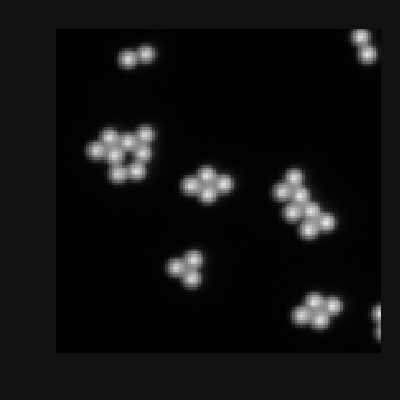

<IPython.core.display.Javascript object>


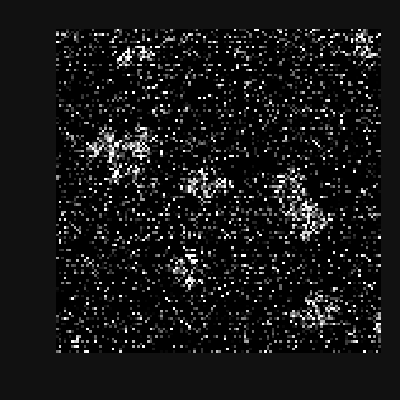

<IPython.core.display.Javascript object>


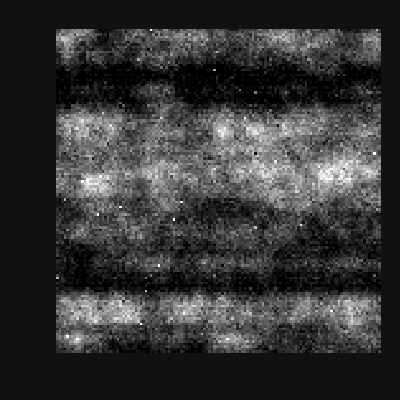

<IPython.core.display.Javascript object>


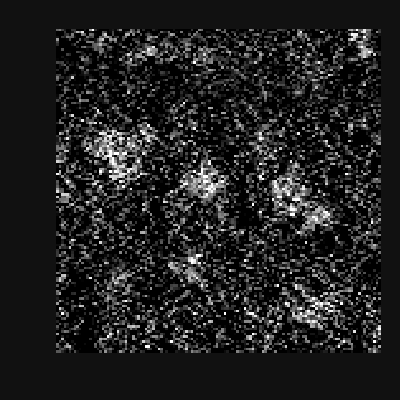

<IPython.core.display.Javascript object>


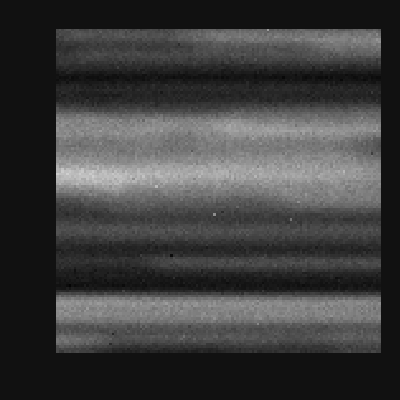

<IPython.core.display.Javascript object>


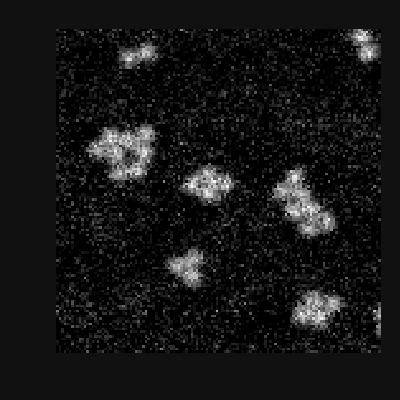

In [10]:
roi = beads_roi_crop_B_2

beads_sns_snr_crop = beads_sns_unreg[roi.slice]
beads_strobe_snr_crop = beads_strobe_unreg[roi.slice]
beads_coded_snr_crop = beads_coded_unreg[roi.slice]
beads_constant_snr_crop = beads_constant_unreg[roi.slice]
beads_constant_raw_snr_crop = beads_constant_raw_unreg[roi.slice]
beads_coded_raw_snr_crop = beads_coded_raw[roi.slice]

plt.figure(figsize=(4,4))
plt.imshow(beads_sns_snr_crop)
plt.clim((350,30000))
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_beads_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(beads_strobe_snr_crop)
plt.axis('off')
plt.clim((380, 400))
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'strobe_beads_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(beads_coded_raw_snr_crop)
plt.axis('off')
plt.clim((380,600))
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'blurred_beads_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(beads_constant_snr_crop)
plt.clim((380,20000))
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'constant_beads_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(beads_constant_raw_snr_crop)
plt.clim((380,2000))
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'constant_raw_beads_sns.pdf'), transparent=True)

plt.figure(figsize=(4,4))
plt.imshow(beads_coded_snr_crop)
plt.clim((380,3000))
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'deblurred_beads_sns.pdf'), transparent=True)

## Load Comparison Data

## Plot Illuminance

In [11]:
# Define system parameters for our system
system_params_2 = {
                             'pixel_count': (2580, 2180),
                             'numerical_aperture': 0.25,
                             'magnification': 10.0,
                             'pixel_size': 6.5e-6,
                             'illumination_rep_rate': 250e3,  # Hz
                             'motion_settle_time': 0.25,  # seconds
                             'motion_acceleration': 1e4,  # mm / s / s
                             'motion_velocity_max': 40,  # mm / s
                             'motion_velocity': 25,  # mm / s
                             'illumination_beta': 0.5,
                             'motion_axis': 1,
                             'illuminance': 450,  # lux
                             'n_tests': 25,
#                              'sample_photobleach_photon_count': None,
                             'sample_quantum_yield': 1.0,
#                              'sample_autofluorescence_signal_ratio': 0.0,
                             'frame_overlap': 0.8,
                             'pulse_count': 25,
                             'camera_is_color': False,
                             'camera_readout_time': 0.032,  # seconds
                             'camera_quantum_efficency': 0.55,
                             'camera_max_counts': 1e8,
                             'camera_dark_current': 0.9,
                             'camera_readout_noise': 3.85,
                             'sample_fill_fraction': 0.05
                         }

In [12]:
# Get system parameters
system_params = analysis.getDefaultSystemParams(camera_max_counts=1e8, pulse_count=25, sample_quantum_yield=1)

<IPython.core.display.Javascript object>


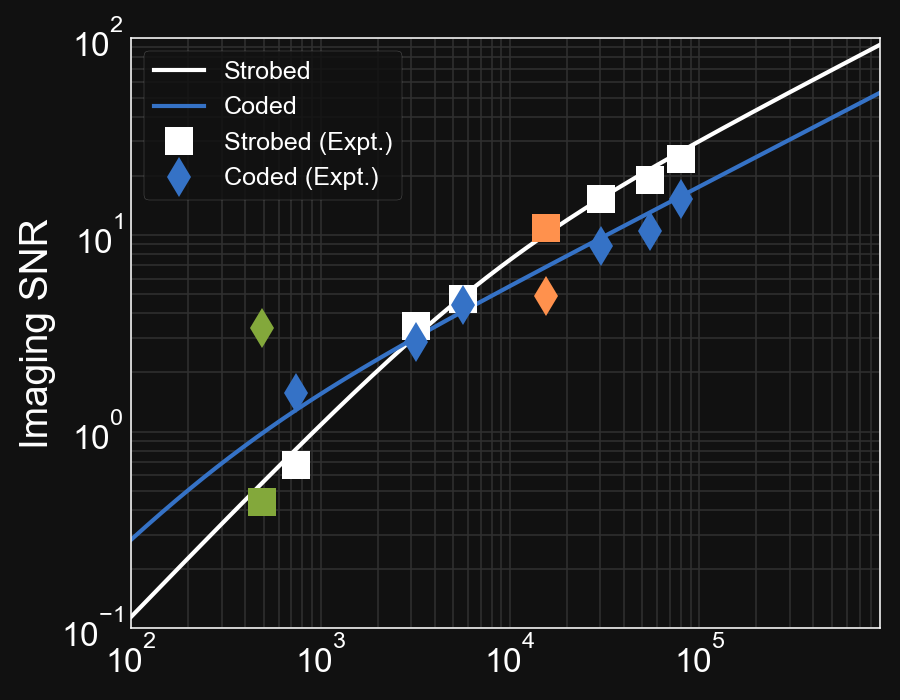

In [23]:
# Get system parameters
# system_params = analysis.getDefaultSystemParams(camera_max_counts=1e8, pulse_count=25, sample_quantum_yield=1)

# Define which frame rates to use
illuminance_list = 10 ** np.arange(2, 7, 0.01)

# Initialize lists
snr_strobe_list, snr_coded_list = [], []
snr_strobe_list_noisy, snr_coded_list_noisy = [], []
snr_strobe_list_noiseless, snr_coded_list_noiseless = [], []

# Measurements: 11 Hz
frame_rate = 11

archive_res = np.load('pulse_snr_results.npz')
pulse_count_list = archive_res['pulse_count_list']
res_illuminance_list = archive_res['illuminance_list'].tolist()
data = archive_res['data']

res_strobe_snr_list = data[:, 0].tolist()
res_coded_snr_list = data[:, 6].tolist()

for index, illuminance in enumerate(illuminance_list):
    
    # Set illuminance
    system_params['illuminance'] = illuminance
    
    # Calculate source illuminance
    photon_pixel_rate = analysis.illuminanceToPhotonPixelRate(**system_params)

    # Strobed
    t_strobe, dnf_strobe = analysis.frameRateToExposure(frame_rate, photon_pixel_rate, 'strobe', **system_params)
    snr_strobe = analysis.exposureTimeToSnr(t_strobe, dnf=dnf_strobe, **system_params)
    snr_strobe_list.append(snr_strobe)
    
    # Coded
    t_coded, dnf_coded = analysis.frameRateToExposure(frame_rate, photon_pixel_rate, 'coded', **system_params)
    snr_coded = analysis.exposureTimeToSnr(t_coded, dnf=dnf_coded, **system_params)
    snr_coded_list.append(snr_coded)

# Perform plotting
lw = 3
plt.figure(figsize=(9, 7))

# Relevent Prediction
plt.loglog(illuminance_list, snr_strobe_list, 'w-', linewidth=lw, label='Strobed')
plt.loglog(illuminance_list, snr_coded_list, 'b-', linewidth=lw, label='Coded')

# # # Plot experimental points (THESE ARE ALWAYS FIXED)
illum_beads = 493
plt.plot([illum_beads], [snr_strobed_beads], c='g', markersize=20, marker='s')#, label='Fluor. Strobed')
plt.plot([illum_beads], [snr_coded_beads], c='g', markersize=20, marker='d')#, label='Fluor. Coded')


highlight_index = 3
illum = res_illuminance_list.pop(highlight_index)
snr_coded = res_coded_snr_list.pop(highlight_index)
snr_strobe = res_strobe_snr_list.pop(highlight_index)

plt.plot([illum], [snr_strobe], c='y', markersize=20, marker='s', linewidth=0)
plt.plot([illum], [snr_coded], c='y', markersize=20, marker='d', linewidth=0)

# Plot New Resolution Target Data
plt.plot(res_illuminance_list, res_strobe_snr_list, c='w', markersize=20, marker='s', linewidth=0, label='Strobed (Expt.)')
plt.plot(res_illuminance_list, res_coded_snr_list, c='b', markersize=20, marker='d', linewidth=0, label='Coded (Expt.)')

# Configure figure
plt.legend(fontsize=18, loc='upper left')
# plt.xlabel('Source Illuminance (Lux)', fontsize=28)
plt.ylabel('Imaging SNR', fontsize=28)
plt.ylim((1e-1, 1e2))
plt.xlim((1e2, 9e5))
plt.grid('on', which='both')

# Set up ticks
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
    
# # Add error bars
# q = ax.errorbar([illum_beads], [snr_strobed_beads], yerr=[[snr_strobed_error_beads, 10]], xerr=[0],
#             fmt='o', ecolor='b', capthick=2)

# plt.style.use('deblur')
# Save
plt.tight_layout()
plt.savefig(os.path.join(figure_directory, 'snr_comparison_noisy.pdf'), transparent=True)

## Compute Representative Illumination Values